In [1]:
import math
import numpy as np

In [2]:
def calculo_calidad(valor_propiedad_actual : float, propiedad_estado_f : float, propiedad_estado_g : float) -> float :
    """
    EXERGIA-CODE : https://github.com/NiengLee/termodinamica_general/blob/main/funciones_termodinamica.ipynb
    
    Permite calcular la calidad de una sustancia en estado de saturación:
    
    Datos de entrada:
    - valor_propiedad_actual : el valor de la propiedad intermedia entre estado f y g a condiciones dadas de T y P.
    - propiedad_estado_f : el valor de la propiedad en el estado de líquido saturado a T y P dadas.
    - propiedad_estado_g : el valor de la propiedad en el estado de vapor saturado a T y P dadas.
    
    Retorna:
    - x_calidad : porcentaje de vapor en la mezcla de vapor y líquido en etapa de saturación. 
    
    """
    propiedad_gf = propiedad_estado_g - propiedad_estado_f
    x_calidad = (valor_propiedad_actual-propiedad_estado_f) / propiedad_gf
    return x_calidad


def valor_propiedad_saturacion(x_calidad : float, propiedad_estado_f : float, propiedad_estado_g : float):
    """
    EXERGIA-CODE : https://github.com/NiengLee/termodinamica_general/blob/main/funciones_termodinamica.ipynb
    
    Permite calcular la calidad de una sustancia en estado de saturación:
    
    Datos de entrada:
    - x_calidad : porcentaje de vapor en la mezcla de vapor y líquido en etapa de saturación. 
    - propiedad_estado_f : el valor de la propiedad en el estado de líquido saturado a T y P dadas.
    - propiedad_estado_g : el valor de la propiedad en el estado de vapor saturado a T y P dadas.
    
    Retorna:
    - valor_propiedad_x : el valor de la propiedad intermedia entre estado f y g a condiciones dadas de T y P.
    
    """
    valor_propiedad_x = propiedad_estado_f + x_calidad * (propiedad_estado_g-propiedad_estado_f)
    return valor_propiedad_x

def resultado_interpolacion(x_busqueda, x_inicial, y_inicial, x_final, y_final):
    """
    EXERGIA-CODE : https://github.com/NiengLee/termodinamica_general/blob/main/funciones_termodinamica.ipynb
    
    Permite calcular una propiedad intermedia entre datos tabulados de propiedades termodinámicas
    
    Datos de entrada:
    - x_busqueda : valor de la variable independiente para el cual se desea estimar la propiedad (por ejemplo T o P).
    - x_inicial : valor inferior conocido de la variable independiente.
    - y_inicial : valor de la propiedad correspondiente a x_inicial.
    - x_final : valor superior conocido de la variable independiente.
    - y_final : valor de la propiedad correspondiente a x_final.
    
    Retorna:
    - valor_propiedad_x : el valor de la propiedad intermedia entre estado f y g a condiciones dadas de T y P.
    
    """
    m = (y_final-y_inicial)/(x_final-x_inicial)
    resultado = m*(x_busqueda-x_inicial) + y_inicial
    return resultado

# Pagina 123 , 18 - Kennet wark

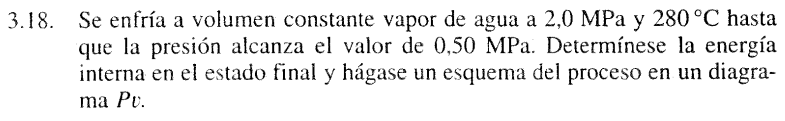

In [ ]:
print("Realizado por ExergiaCode : ")
#   Condiciones iniciales - vapor de agua
Pi = 2 * (10) # bar
Ti = 280 + 273.15 # K
#   consulta en datos tabulados de condiciones iniciales
vesp_i = 0.12 # m³/kg

#   Condiciones finales - saturado
Pf = 0.5 * (10) # bar
vesp_f = vesp_i

#   consulta en datos tabulados de condiciones finales
vesp_liq_saturado = 1.0926e-3
vesp_vap_saturado = 0.3749
u_liq_saturado = 639.68
u_vap_saturado = 2561.2

#   Desarrollo - delta_v  = 0
#   Objetivos : u_f, proceso pv

x = calculo_calidad(vesp_f, vesp_liq_saturado, vesp_vap_saturado)

print(f"la calidad de vapor es : {x:,.3f}")

u_final = valor_propiedad_saturacion(x , u_liq_saturado, u_vap_saturado)

print(f"la energia interna en el estado final es : {u_final:,.4f} kJ/kg")

Realizado por ExergiaCode : 
la calidad de vapor es : 0.318
la energia interna en el estado final es : 1,250.9117 kJ/kg


# Pagina 124 , 32 - Kennet wark

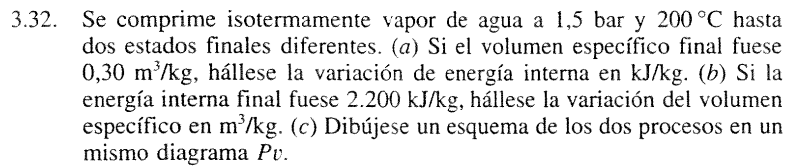

In [ ]:
print("Realizado por ExergiaCode : ")
#   Condiciones iniciales - vapor de agua
Pi = 1.5 # bar
Ti = 200 # C
# consulta en datos tabulados - cond entrada
ui = 2656.2 # kJ/kg
vesp_i = 1.444 # m³ / kg

#   Condiciones finales 1
vesp_f1 = 0.3 # m³/kg
# consulta en datos tabulados - cond salida 1
u_f1 = 2634.8

#   Condiciones finales 2
u_f2 = 2200 # kJ/kg
# consulta en datos tabulados - cond salida 1 - T= 200C
u_liq_sat = 850.65
u_vap_sat = 2595.3
vesp_liq_sat = 1.1565e-3
vesp_vap_sat = 0.1274

#   Desarrollo - delta_T = 0

#   Objetivos : 1 delta_u [=] kJ/kg ; 2 delta_vesp [=] m³/kg

delta_u1 = u_f1 - ui

print(f"el cambio de energía interna para el literal a es {delta_u1:,.4f} kJ/kg")

x = calculo_calidad(u_f2, u_liq_sat, u_vap_sat)
vesp_f2 = valor_propiedad_saturacion(x, vesp_liq_sat, vesp_vap_sat) 
delta_vesp2 = vesp_f2 - vesp_i

print(f"el cambio de volumen específico para el literal b es {delta_vesp2:,.4f} m³/kg")

Realizado por ExergiaCode : 
el cambio de energía interna para el literal a es -21.4000 kJ/kg
el cambio de volumen específico para el literal b es -1.3452 m³/kg


# Pagina 128 , 55 - Kennet wark

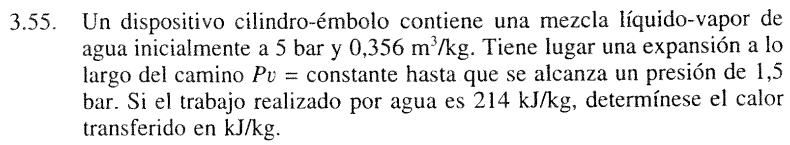

In [ ]:
print("Realizado por ExergiaCode : ")
#   Condiciones iniciales - agua estado saturado
P_inicial = 5 # bar
vesp_inicial = 0.356 # m³/kg
#   Consulta de datos tabulatos condiciones iniciales
vesp_inicial_f = 1.0926e-3
vesp_inicial_g = 0.3749
u_inicial_f = 639.68
u_inicial_g = 2561.2

#   Condiciones finales
P_final = 1.5 # bar
#   Consulta de datos tabulatos condiciones finales


#   Desarrollo - Pv = constante
W_out = 214 # kJ/kg

#   Objetivo : hallar Q [=] kJ/kg

cte = P_inicial * vesp_inicial
vesp_final = cte / P_final

print(f"el volumen específico final es {vesp_final:,.4f} m³/kg")

x = calculo_calidad(vesp_inicial, vesp_inicial_f, vesp_inicial_g)
u_inicial = valor_propiedad_saturacion(x, u_inicial_f, u_inicial_g)

vesp_final_1 = 1.159
vesp_final_2 = 1.188
u_final_1 = 2519.7
u_final_2 = 2533.3

u_final = resultado_interpolacion(vesp_final, vesp_final_1, u_final_1, vesp_final_2, u_final_2)

delta_u = u_final - u_inicial
print(f"el cambio de energía interna es {delta_u:,.4f} kJ/kg")

Q = W_out + delta_u

print(f"la transferencia de calor es {Q:,.4f} kJ/kg")

Realizado por ExergiaCode : 
el volumen específico final es 1.1867 m³/kg
el cambio de energía interna es 68.6283 kJ/kg
la transferencia de calor es 282.6283 kJ/kg


# Pagina 153 , 29 - Cengel

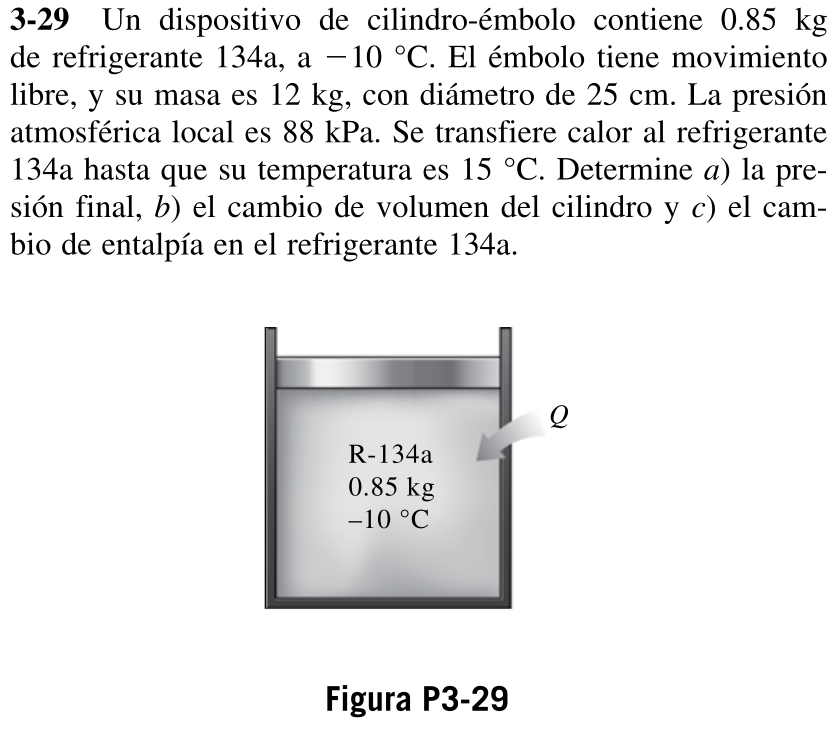

In [ ]:
print("Realizado por ExergiaCode : ")
#   Condiciones iniciales - R134a
Tin = -10 # C

#   Condiciones finales
Tfin = 15 # C

#   Desarrollo - delta_P = 0, presión constante
m_r134a = 0.85 # kg
m_emb = 12     # kg
D_emb = 25 * (1/100) # m
r_emb = D_emb / 2
P_atm = 88 * (1000) # Pa
g = 9.8 # m/s²

#   Objetivo : determinar Pfin ; delta_v ; delta_h
A_emb = np.pi * (r_emb**2)

Pemb = (m_emb*g) / A_emb
Pin = P_atm + Pemb # 90385 Pa, 90.4kPa, 0.0904 MPa 
print(f"La presión inicial es de {Pin:,.4f} Pa")
print(f"La presión inicial es de {Pin/1000:,.4f} kPa")
print(f"La presión inicial es de {Pin/1000000:,.4f} MPa")

# inicial, Pinicial = 0.0904 MPa, Tinicial = -10 C
Pin = Pin/1000000
P006 = 0.06 # MPa
P01 = 0.1 # MPa
vesp_P006_menos10 = 0.35048
vesp_P01_menos10 = 0.20743
h_P006_menos10 = 248.60
h_P01_menos10 = 247.51
vesp_Pin_inicial = resultado_interpolacion(Pin,P006,vesp_P006_menos10,P01,vesp_P01_menos10)
h_Pin_inicial = resultado_interpolacion(Pin,P006,h_P006_menos10,P01,h_P01_menos10)
print(f"volumen específico inicial {vesp_Pin_inicial:,.4f} m³/kg ; entalpía inicial {h_Pin_inicial:,.4f} kJ/kg")

# final, Pfinal = 0.0904 MPa, Tfinal = 15 C
Pfinal = Pin
T10 = 10
T20 = 20
# P006 - determinar 15C
vesp_P006_10 = 0.37893
vesp_P006_20 = 0.39302
h_P006_10 = 264.68
h_P006_20 = 272.95
vesp_P006_15 = resultado_interpolacion(Tfin,T10,vesp_P006_10,T20,vesp_P006_20)
h_P006_15 = resultado_interpolacion(Tfin,T10,h_P006_10,T20,h_P006_20)

# P01 - determinar 15C
vesp_P01_10 = 0.22506
vesp_P01_20 = 0.23373
h_P01_10 = 263.82
h_P01_20 = 272.18
vesp_P01_15 = resultado_interpolacion(Tfin,T10,vesp_P01_10,T20,vesp_P01_20)
h_P01_15 = resultado_interpolacion(Tfin,T10,h_P01_10,T20,h_P01_20)

# P009 - determinar 15C
vesp_Pfin_final = resultado_interpolacion(Pfinal,P006,vesp_P006_15,P01,vesp_P01_15)
h_Pfin_final = resultado_interpolacion(Pfinal,P006,h_P006_15,P01,h_P01_15)
print(f"volumen específico final {vesp_Pfin_final:,.4f} m³/kg ; entalpía final {h_Pfin_final:,.4f} kJ/kg")

# determinar los cambios
delta_v = m_r134a * (vesp_Pfin_final - vesp_Pin_inicial)
delta_h = m_r134a * (h_Pfin_final - h_Pin_inicial)

print(f"el cambio devolumen específico final {delta_v:,.4f} m³ ; el cambio de entalpía final {delta_h:,.4f} kJ")

Realizado por ExergiaCode : 
La presión inicial es de 90,395.7275 Pa
La presión inicial es de 90.3957 kPa
La presión inicial es de 0.0904 MPa
volumen específico inicial 0.2418 m³/kg ; entalpía inicial 247.7717 kJ/kg
volumen específico final 0.2670 m³/kg ; entalpía final 268.1957 kJ/kg
el cambio devolumen específico final 0.0214 m³ ; el cambio de entalpía final 17.3604 kJ


# Pagina 154 , 41 - Cengel

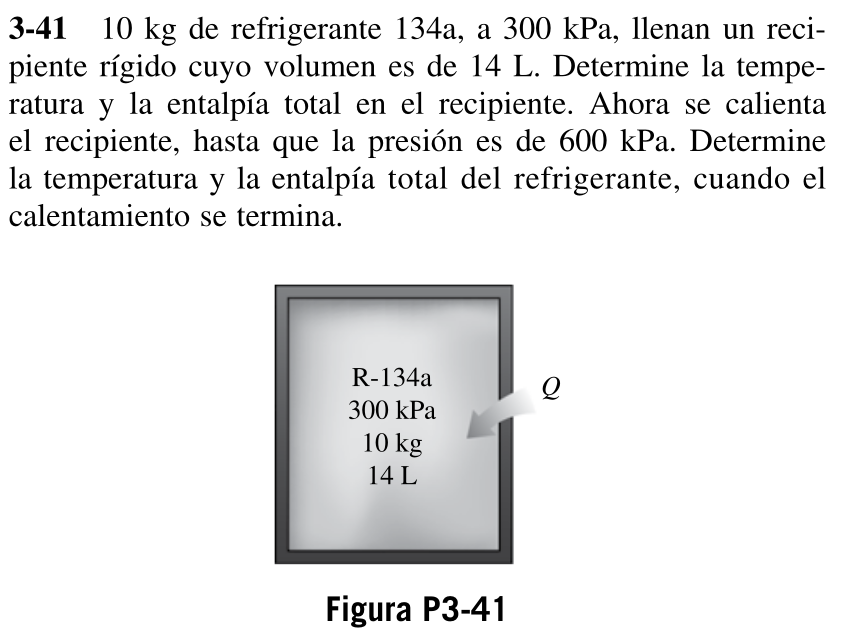

In [7]:
print("Realizado por Exergia Code :")
#   Condiciones iniciales
m = 10                      # kg
V = 14 * (1/1000)           # m³
vesp_inicial = V/m          # 0.0014 m³/kg
P_inicial = 300             # kPa, 0,3 Mpa 

#   Condiciones finales
vesp_final = vesp_inicial   # 0.0014 m³/kg
P_final = 600               # kPa, 0,6 Mpa

#   Objetivos : determinar temperatura y entalpía en: condiciones iniciales ; condiciones finales
print(f"el volumen específico constante es : {vesp_inicial}")

# analisis condiciones iniciales:
P_inicial_280Pa = 280
P_inicial_320Pa = 320
T_inicial_280Pa = -1.25
T_inicial_320Pa = 2.46
vesp_inicial_280Pa_f = 0.0007697 
vesp_inicial_320Pa_f = 0.0007771
vesp_inicial_280Pa_g = 0.072434 
vesp_inicial_320Pa_g = 0.063681
h_inicial_280Pa_f = 50.16
h_inicial_320Pa_f = 55.14
h_inicial_280Pa_g = 249.77
h_inicial_320Pa_g = 251.93

vesp_inicial_300Pa_f = resultado_interpolacion(P_inicial,P_inicial_280Pa,vesp_inicial_280Pa_f,P_inicial_320Pa,vesp_inicial_320Pa_f)
vesp_inicial_300Pa_g = resultado_interpolacion(P_inicial,P_inicial_280Pa,vesp_inicial_280Pa_g,P_inicial_320Pa,vesp_inicial_320Pa_g)
h_inicial_300Pa_f = resultado_interpolacion(P_inicial,P_inicial_280Pa,h_inicial_280Pa_f,P_inicial_320Pa,h_inicial_320Pa_f)
h_inicial_300Pa_g = resultado_interpolacion(P_inicial,P_inicial_280Pa,h_inicial_280Pa_g,P_inicial_320Pa,h_inicial_320Pa_g)
T_inicial_300Pa = resultado_interpolacion(P_inicial, P_inicial_280Pa, T_inicial_280Pa,P_inicial_320Pa,T_inicial_320Pa)

x_inicial = calculo_calidad(vesp_inicial,vesp_inicial_300Pa_f,vesp_inicial_300Pa_g)
h_inicial = valor_propiedad_saturacion(x_inicial, h_inicial_300Pa_f, h_inicial_300Pa_g)

print(f"la temperatura en estado inicial es {T_inicial_300Pa} °C ; la entalpía en estado inicial es {h_inicial} kJ/kg")
print(f"la temperatura en estado inicial es {T_inicial_300Pa} °C ; la entalpía en estado inicial es {h_inicial*m} kJ")

# analisis condiciones finales : 
T_final = 21.55 # °C

vesp_final_f = 0.0008198
vesp_final_g = 0.034335
h_final_f = 81.50 
h_final_g = 262.46

x_final = calculo_calidad(vesp_final, vesp_final_f, vesp_final_g)
h_final = valor_propiedad_saturacion(x_final,h_final_f, h_final_g)

print(f"la temperatura en estado final es {T_final} °C ; la entalpía en estado final es {h_final:,.3f} kJ/kg")
print(f"la temperatura en estado final es {T_final} °C ; la entalpía en estado final es {h_final*m:,.3f} kJ")

Realizado por Exergia Code :
el volumen específico constante es : 0.0014
la temperatura en estado inicial es 0.605 °C ; la entalpía en estado inicial es 54.49578704329849 kJ/kg
la temperatura en estado inicial es 0.605 °C ; la entalpía en estado inicial es 544.9578704329849 kJ
la temperatura en estado final es 21.55 °C ; la entalpía en estado final es 84.633 kJ/kg
la temperatura en estado final es 21.55 °C ; la entalpía en estado final es 846.327 kJ


# Pagina 155 , 51 - Cengel

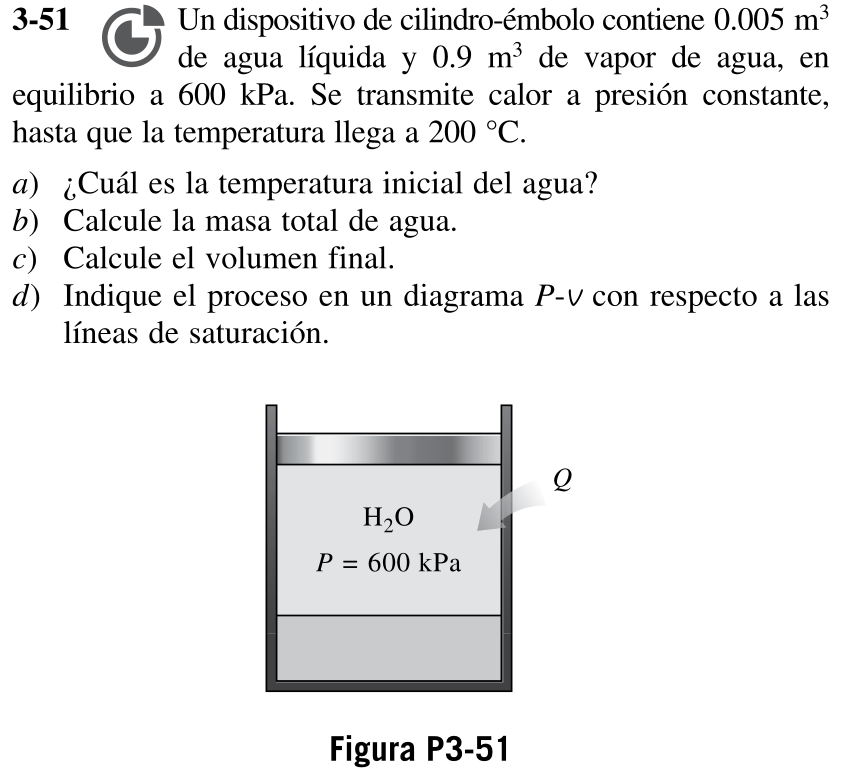

In [8]:
print("Realizado por Exergia Code :")
#   Condiciones iniciales
V_liq = 0.005 # m³
V_vap = 0.9 # m³
Pini = 600 # kPa , 0.6 MPa

#   Condiciones finales
T_fin = 200 # C
Pfin = Pini

#   Desarrollo - delta_P = 0
#   Objetivo : T_ini ; m_total ; V_final
T_inicial = 158.83 # °C
print(f"La temperatura en estado inicial es de {T_inicial} °C - Esta en estado de saturación a P = {Pini} kPa")

vesp_f = 0.001101
vesp_g = 0.31560

m_liq = V_liq / vesp_f
m_vap = V_vap / vesp_g
m_total = m_liq + m_vap

print(f"la masa total de agua es {m_total:,.4f} kg")
vesp_final = 0.35212 # m³/kg

V_final= vesp_final * m_total
print(f"El volumen total ocupado en dentro del pistón en estado final es {V_final:,.4f} m³")


Realizado por Exergia Code :
La temperatura en estado inicial es de 158.83 °C - Esta en estado de saturación a P = 600 kPa
la masa total de agua es 7.3930 kg
El volumen total ocupado en dentro del pistón en estado final es 2.6032 m³
